# Time Series Plotting

Plotting various time series<br>
a. Raw Values.<br>
b. Relative Values and Differences.<br>
c. Tryout rolling and windowed means for muon rates.

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import rcParamsDefault
from matplotlib.ticker import LinearLocator
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
def drawheatmap(table,title):
    """draws heatmap of corelation table and put the title of the diagram"""
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(table, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(table, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
    ax.set_title(title)

## load data, create dataframe for plotting

In [3]:
data=pd.read_csv("../DataSet4Analysis.csv",index_col=0)
columns4anal=["unixtime","Pressure","Temperature","Humidity","Rain","muon_rate"]
data4anal=data[columns4anal]
data4anal=data4anal.fillna(0.0)
mask_index=data4anal.loc[data4anal["Pressure"]==0.0].index
data4anal=data4anal.drop(mask_index)
data4anal["datetime"]=data4anal["unixtime"].apply(datetime.fromtimestamp)
data4anal.set_index("datetime",inplace=True)
data4anal.drop(columns="unixtime",inplace=True)
#data4anal_aggr=data4anal.resample('400S')
#data_aggr_mean=data4anal_aggr.mean()
#data_aggr_err=data4anal_aggr.sem()

/Users/theoavg/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## a. Plot raw values time series  

In [4]:
#create a data frame copy
rawdata=data4anal.copy()

In [5]:
rawdata.describe()

,Pressure,Temperature,Humidity,Rain,muon_rate
count,1.489198e+06,1.489198e+06,1.489198e+06,1.489198e+06,1.489198e+06
mean,1.025034e+03,1.037160e+01,7.888049e+01,7.038795e-02,1.794887e+01
std,9.145541e+00,3.480528e+00,1.531698e+01,6.991321e-01,4.980810e+00
min,9.985500e+02,4.400000e-01,2.100000e+01,0.000000e+00,0.000000e+00
25%,1.018420e+03,7.560000e+00,7.200000e+01,0.000000e+00,1.500000e+01
50%,1.028310e+03,1.089000e+01,8.400000e+01,0.000000e+00,1.800000e+01
75%,1.032100e+03,1.322000e+01,9.100000e+01,0.000000e+00,2.100000e+01
max,1.038530e+03,1.739000e+01,9.500000e+01,4.160000e+01,1.060000e+02


In [6]:
rawdata["muon_rol_1000s"]=rawdata["muon_rate"].rolling('1000S').mean()

In [7]:
rawdata.head()

,Pressure,Temperature,Humidity,Rain,muon_rate,muon_rol_1000s
datetime,,,,,,
2020-02-14 11:17:17,1022.919983,13.11,87.0,0.0,21.0,21.0
2020-02-14 11:17:18,1022.919983,13.11,87.0,0.0,18.0,19.5
2020-02-14 11:17:19,1022.919983,13.11,87.0,0.0,15.0,18.0
2020-02-14 11:17:20,1022.919983,13.11,87.0,0.0,18.0,18.0
2020-02-14 11:17:21,1022.919983,13.11,87.0,0.0,16.0,17.6


Text(0, 0.5, 'Muon Rates (Hz)')

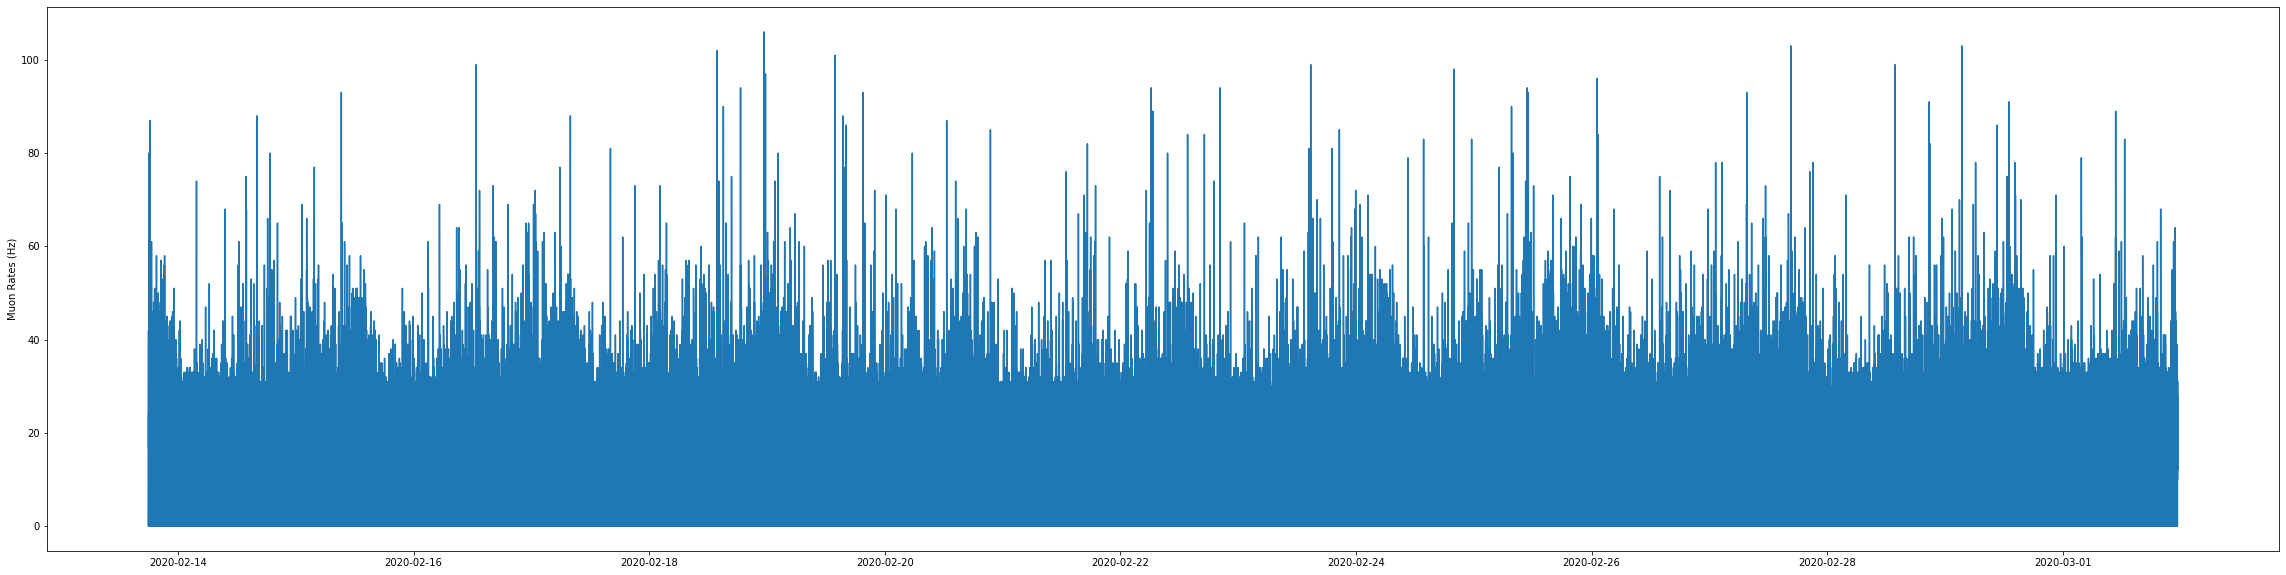

In [10]:
#plt.plot("muon_rol_500s",data=rawdata)
fig, axs = plt.subplots(1,figsize=(40,10))

axs.plot('muon_rate',data=rawdata.iloc[1000::])
axs.xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs.set_ylabel("Muon Rates (Hz)")

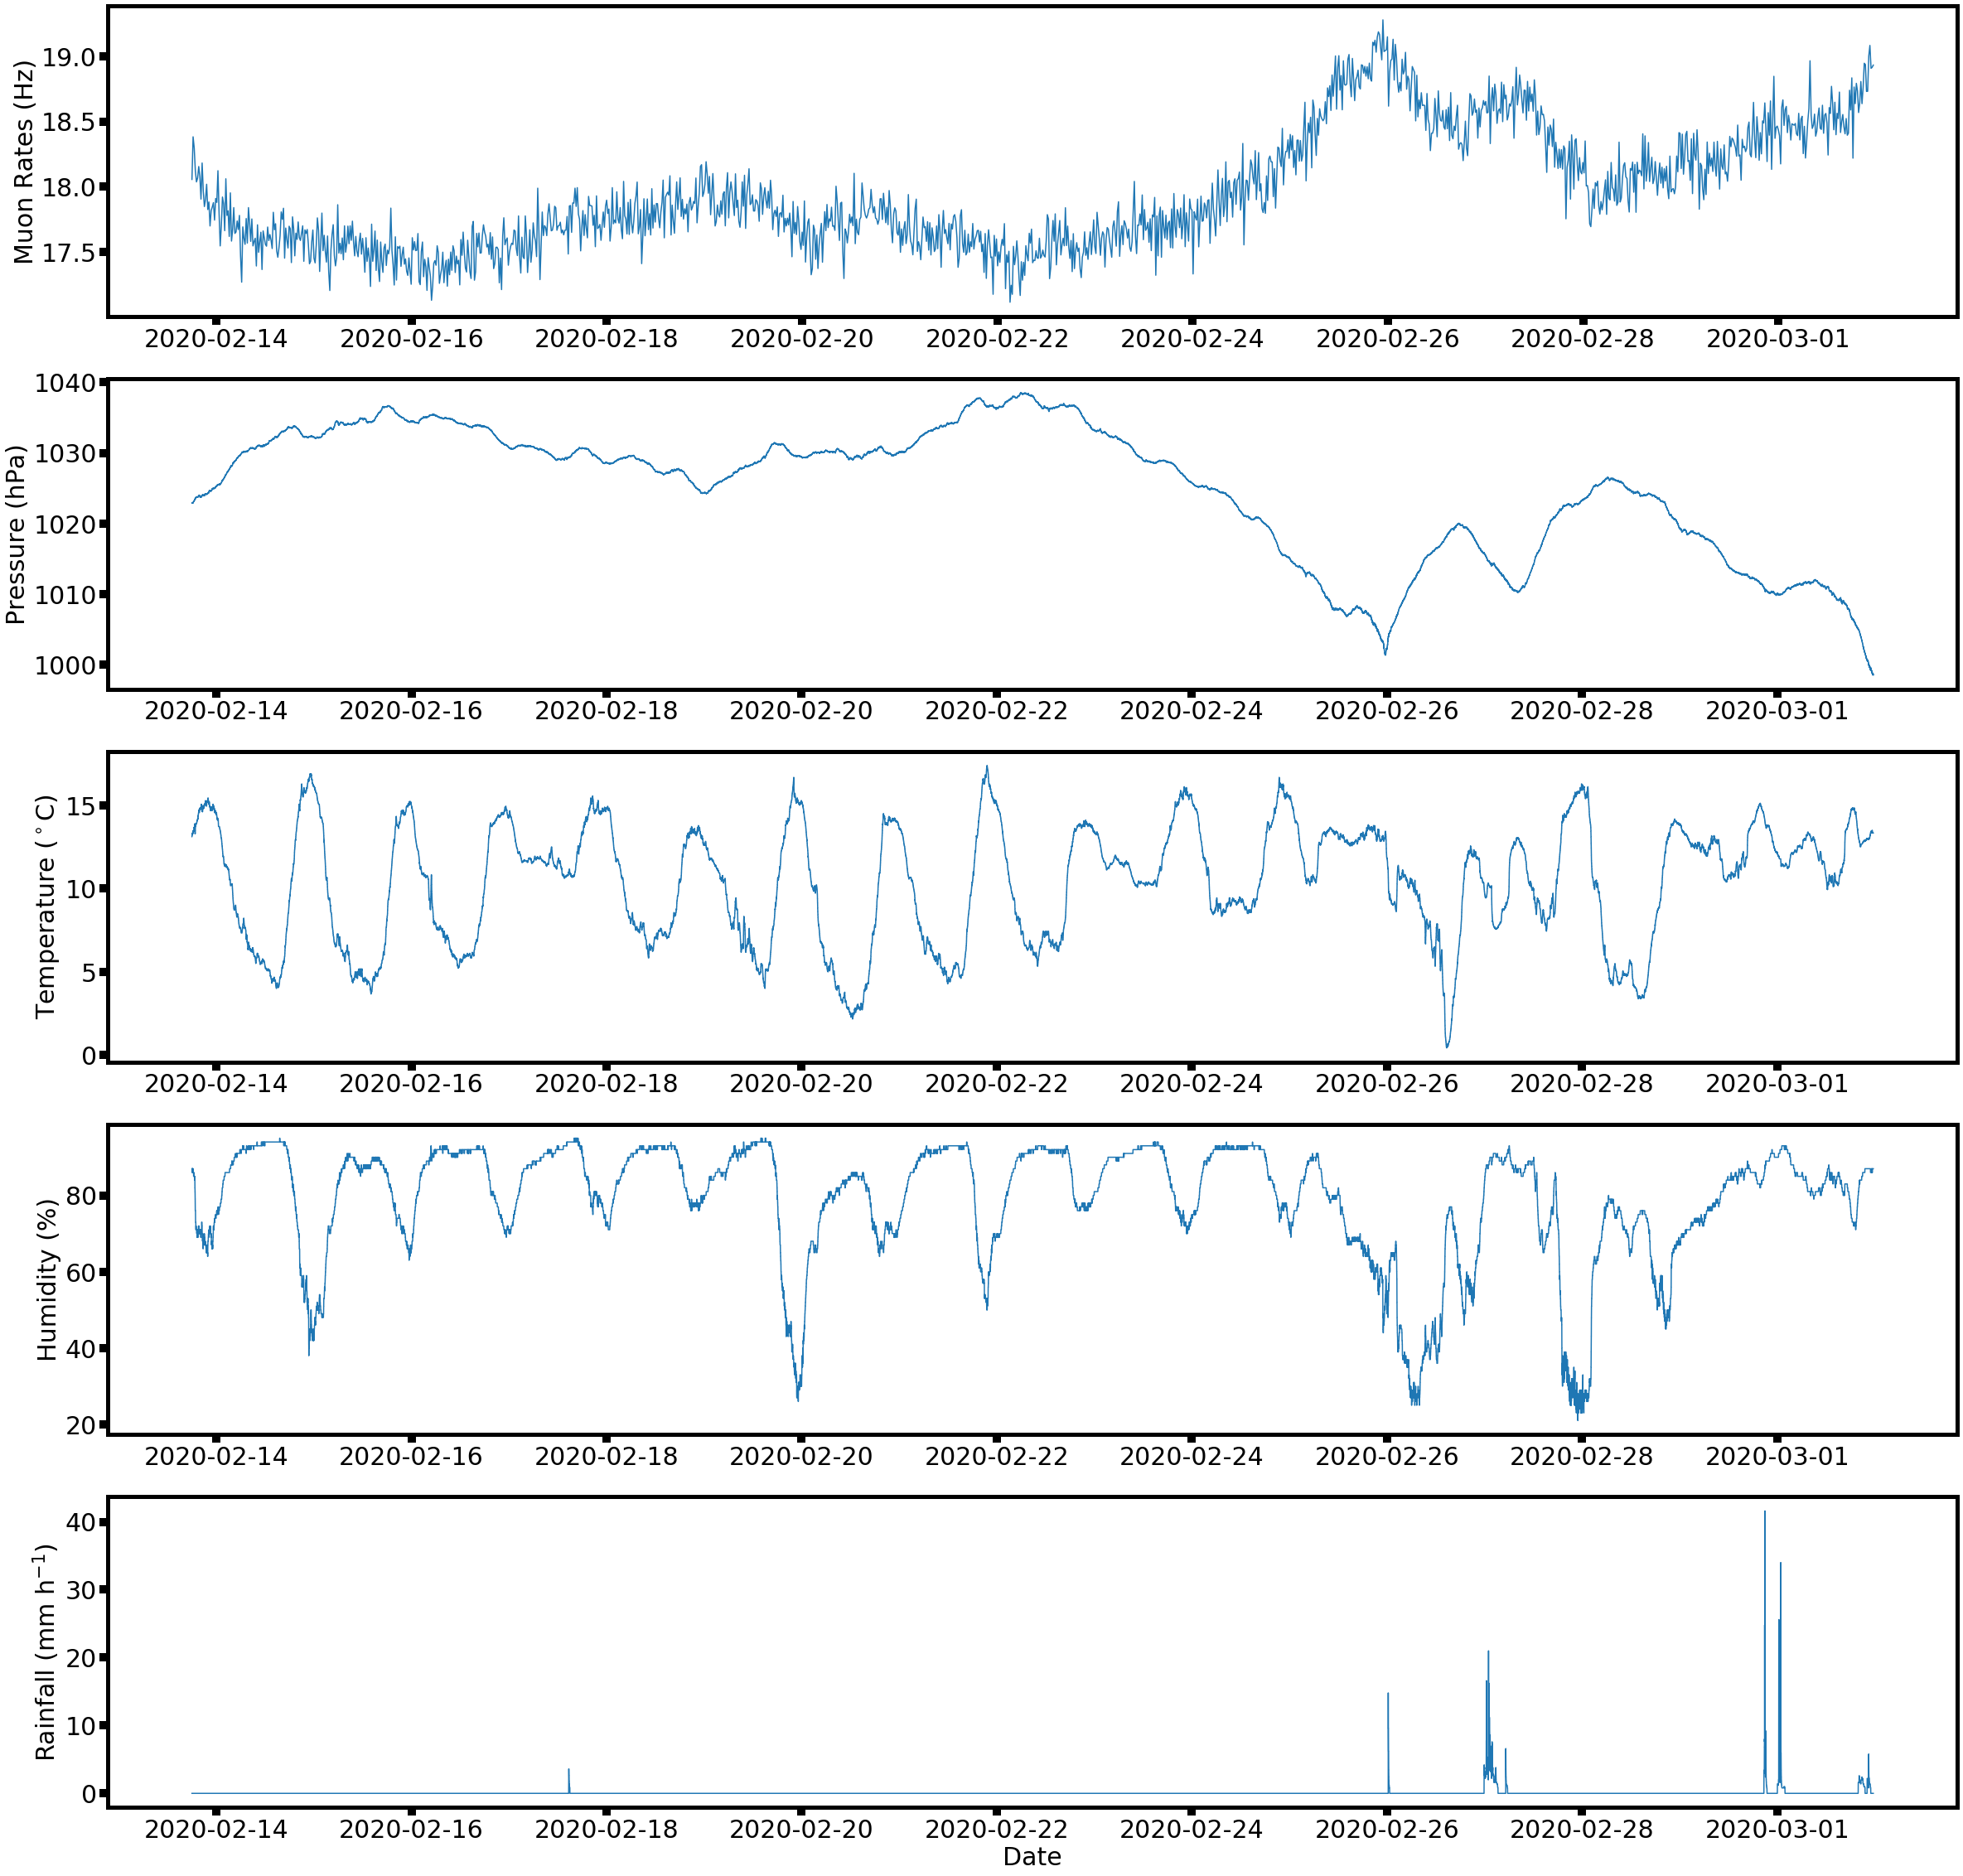

In [47]:
rcParams['axes.linewidth'] = 5
rcParams['font.size'] = 30
rcParams['xtick.major.size']=10
rcParams['xtick.major.width']=10
rcParams['ytick.major.size']=10
rcParams['ytick.major.width']=10
#rcParams['xaxis.set_major_locator']=LinearLocator(10)
fig, axs = plt.subplots(5, 1,figsize=(40,40))

axs[0].plot('muon_rol_1000s',data=rawdata.iloc[1000::1000])
axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[0].set_ylabel("Muon Rates (Hz)")
#axs[0].plot("muon_rate",data=rawdata)
#axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
#axs[0].set_ylabel("Muon Rates (Hz)")

axs[1].plot("Pressure",data=rawdata)
axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[1].set_ylabel("Pressure (hPa)")

axs[2].plot("Temperature",data=rawdata)
axs[2].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[2].set_ylabel("Temperature ($^\circ$C)")

axs[3].plot("Humidity",data=rawdata)
axs[3].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[3].set_ylabel("Humidity (%)")

axs[4].plot("Rain",data=rawdata)
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[4].set_ylabel("Rainfall (mm h$^{-1}$)")
plt.xlabel("Date")
plt.show()

## b. Relative Values and Differences. 

In [48]:
relativedata=rawdata.copy()

In [51]:
relativedata.head()

,Pressure,Temperature,Humidity,Rain,muon_rate,muon_rol_1000s
datetime,,,,,,
2020-02-14 11:17:17,1022.919983,13.11,87.0,0.0,21.0,21.0
2020-02-14 11:17:18,1022.919983,13.11,87.0,0.0,18.0,19.5
2020-02-14 11:17:19,1022.919983,13.11,87.0,0.0,15.0,18.0
2020-02-14 11:17:20,1022.919983,13.11,87.0,0.0,18.0,18.0
2020-02-14 11:17:21,1022.919983,13.11,87.0,0.0,16.0,17.6


In [55]:
przero_mean=relativedata["Pressure"].mean()
przero_sem=relativedata["Pressure"].sem()
tmzero_mean=relativedata["Temperature"].mean()
hmzero_mean=relativedata["Humidity"].mean()
rnzero_mean=relativedata["Rain"].mean()
muzero_mean=relativedata["muon_rate"].mean()
murol_zero_mean=relativedata["muon_rol_1000s"].mean()

In [57]:
print(przero_mean,tmzero_mean,hmzero_mean,rnzero_mean,muzero_mean,murol_zero_mean,sep="\n")

1025.033662520394
10.37159864943183
78.88049339308809
0.0703879538502883
17.948868451340925
17.94860479786957


In [62]:
relativedata=relativedata.drop(relativedata.iloc[:1000].index)

In [72]:
relativedata["pres_diff"]=relativedata["Pressure"].sub(przero_mean)
relativedata["temp_diff"]=relativedata["Temperature"].sub(tmzero_mean)
relativedata["rain_diff"]=relativedata["Rain"].sub(rnzero_mean)
relativedata["humid_diff"]=relativedata["Humidity"].sub(hmzero_mean)
relativedata["muon_rel_diff"]=relativedata["muon_rol_1000s"].sub(murol_zero_mean).div(murol_zero_mean)

/Users/theoavg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/theoavg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/theoavg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [73]:
relativedata.head()

,Pressure,Temperature,Humidity,Rain,muon_rate,muon_rol_1000s,pres_diff,temp_diff,rain_diff,humid_diff,muon_rel_diff
datetime,,,,,,,,,,,
2020-02-14 11:33:57,1022.960022,13.33,86.0,0.0,24.0,18.055,-2.073641,2.958401,-0.070388,7.119507,0.005928
2020-02-14 11:33:58,1022.960022,13.33,86.0,0.0,15.0,18.052,-2.073641,2.958401,-0.070388,7.119507,0.005761
2020-02-14 11:33:59,1022.960022,13.33,86.0,0.0,22.0,18.059,-2.073641,2.958401,-0.070388,7.119507,0.006151
2020-02-14 11:34:00,1022.960022,13.33,86.0,0.0,20.0,18.061,-2.073641,2.958401,-0.070388,7.119507,0.006262
2020-02-14 11:34:01,1022.960022,13.33,86.0,0.0,22.0,18.067,-2.073641,2.958401,-0.070388,7.119507,0.006596


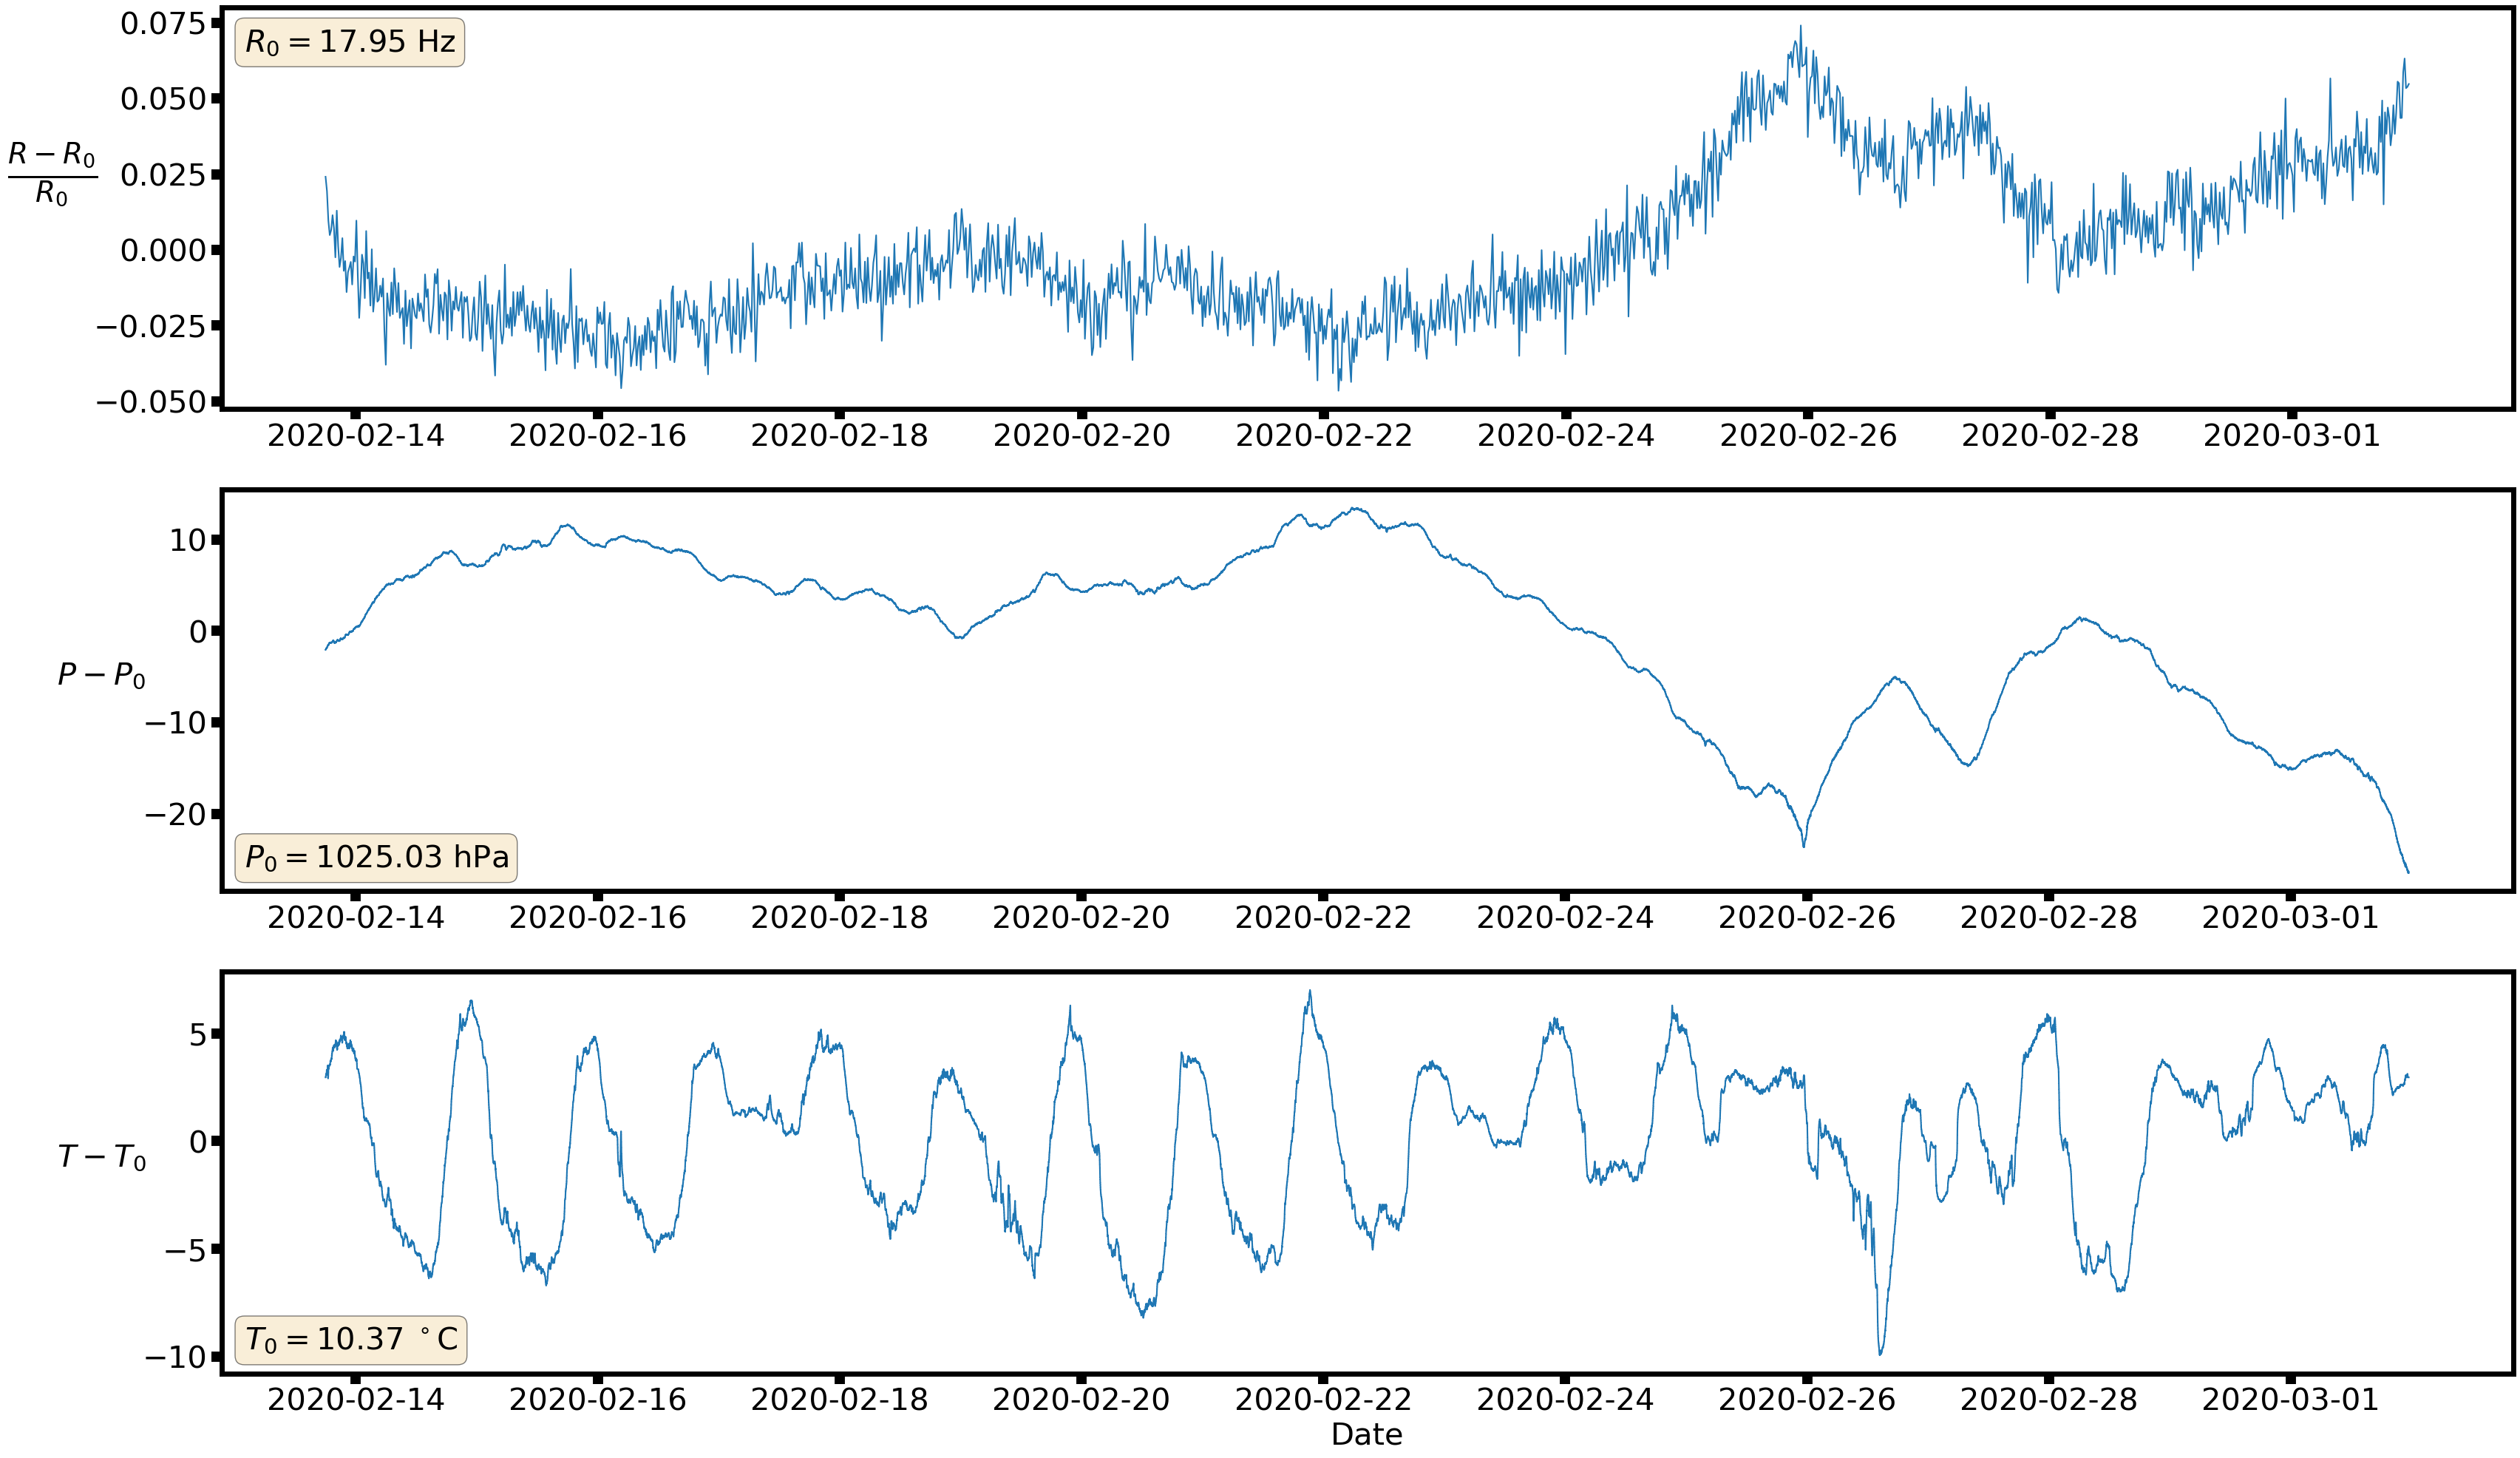

In [140]:
import matplotlib.ticker as ticker
rcParams['axes.linewidth'] = 5
rcParams['font.size'] = 30
rcParams['xtick.major.size']=10
rcParams['xtick.major.width']=10
rcParams['ytick.major.size']=10
rcParams['ytick.major.width']=10
#rcParams['xaxis.set_major_locator']=LinearLocator(10)

fig, axs = plt.subplots(3, 1,figsize=(40,24))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = r'$R_{0}=%.2f$' % (muzero_mean) + ' Hz'
axs[0].plot('muon_rel_diff',data=relativedata.iloc[1000::1000])
axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[0].set_ylabel(r'$\frac{R-R_{0}}{R_{0}}$',rotation=0,fontsize=40,labelpad=40)
axs[0].text(0.01, 0.95, textstr, transform=axs[0].transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

#axs[0].plot("muon_rate",data=rawdata)
#axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
#axs[0].set_ylabel("Muon Rates (Hz)")

textstr = r'$P_{0}=%.2f$' % (przero_mean) + ' hPa'
axs[1].plot("pres_diff",data=relativedata)
axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[1].set_ylabel(r'$P-P_{0}$',rotation=0,fontsize=30,labelpad=40)
axs[1].text(0.01, 0.12, textstr, transform=axs[1].transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

textstr = r'$T_{0}=%.2f$' % (tmzero_mean) + ' $^\circ$C'
axs[2].plot("temp_diff",data=relativedata)
axs[2].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
axs[2].set_ylabel(r'$T-T_{0}$',rotation=0,fontsize=30,labelpad=40)
axs[2].text(0.01, 0.12, textstr, transform=axs[2].transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

#axs[3].plot("humid_diff",data=relativedata)
#axs[3].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
#axs[3].set_ylabel("Humidity (%)")

#axs[4].plot("rain_diff",data=relativedata)
#axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=2,offset=.25))
#axs[4].set_ylabel("Rainfall (mm h$^{-1}$)")
plt.xlabel("Date")
plt.show()

## Plot Pearson

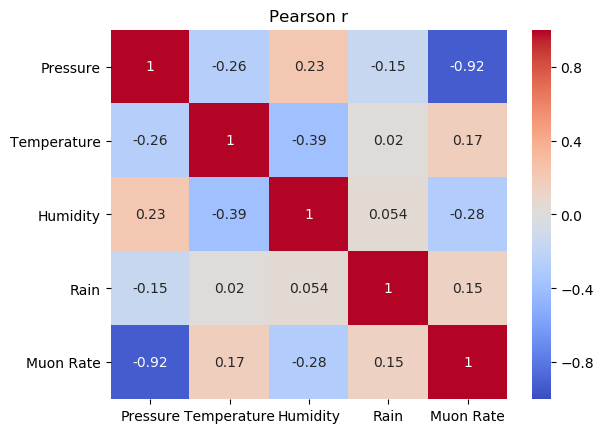

In [111]:
#rcParams.update(rcParamsDefault)
#relativedata["Muon Rate"]=relativedata["muon_rol_1000s"]
ax = plt.axes()
heatmap=sns.heatmap(relativedata[["Pressure", "Temperature","Humidity","Rain","Muon Rate"]].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
ax.set_title('Pearson r')
plt.show()